In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_location'].max()
Min = Mexico['review_scores_location'].min()
Limites = [Min, Max]
Limites

[4.05, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

0.9500000000000002

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.06054954379639365

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (4.05, 5.0, 16)
intervalos

array([4.05      , 4.11333333, 4.17666667, 4.24      , 4.30333333,
       4.36666667, 4.43      , 4.49333333, 4.55666667, 4.62      ,
       4.68333333, 4.74666667, 4.81      , 4.87333333, 4.93666667,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Ubicación mala",
    "Ubicación inaceptable",
    "Ubicación muy mala",
    "Ubicación deficiente",
    "Ubicación pobre",
    "Ubicación aceptable",
    "Ubicación adecuada",
    "Ubicación buena",
    "Ubicación muy buena",
    "Ubicación excelente",
    "Ubicación sobresaliente",
    "Ubicación impecable",
    "Ubicación increíble",
    "Ubicación excepcional",
    "Ubicación perfecta"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_location'] = pd.cut ( x = Mexico ['review_scores_location'], bins = intervalos, labels = categorias )
Mexico['review_scores_location']

0        Ubicación excepcional
1           Ubicación perfecta
2           Ubicación perfecta
3           Ubicación perfecta
4        Ubicación excepcional
                 ...          
26577    Ubicación excepcional
26578    Ubicación excepcional
26579    Ubicación excepcional
26580    Ubicación excepcional
26581    Ubicación excepcional
Name: review_scores_location, Length: 26582, dtype: category
Categories (15, object): ['Ubicación mala' < 'Ubicación inaceptable' < 'Ubicación muy mala' < 'Ubicación deficiente' ... 'Ubicación impecable' < 'Ubicación increíble' < 'Ubicación excepcional' < 'Ubicación perfecta']

In [12]:
table1 = freq_tbl(Mexico['review_scores_location'])
table1

,review_scores_location,frequency,percentage,cumulative_perc
0,Ubicación perfecta,10971,0.412723,0.412754
1,Ubicación excepcional,7955,0.299263,0.712039
2,Ubicación increíble,2305,0.086713,0.798758
3,Ubicación impecable,1911,0.071891,0.870655
4,Ubicación sobresaliente,913,0.034347,0.905004
5,Ubicación excelente,811,0.030509,0.935515
6,Ubicación buena,511,0.019224,0.954740
7,Ubicación muy buena,510,0.019186,0.973928
8,Ubicación aceptable,168,0.006320,0.980248
9,Ubicación pobre,163,0.006132,0.986381


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_location,frequency
0,Ubicación perfecta,10971
1,Ubicación excepcional,7955
2,Ubicación increíble,2305
3,Ubicación impecable,1911
4,Ubicación sobresaliente,913
5,Ubicación excelente,811
6,Ubicación buena,511
7,Ubicación muy buena,510
8,Ubicación aceptable,168
9,Ubicación pobre,163


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_location')
Filtro_index

,frequency
review_scores_location,
Ubicación perfecta,10971
Ubicación excepcional,7955
Ubicación increíble,2305
Ubicación impecable,1911
Ubicación sobresaliente,913
Ubicación excelente,811
Ubicación buena,511
Ubicación muy buena,510
Ubicación aceptable,168


Text(0, 0.5, 'Frecuencia')

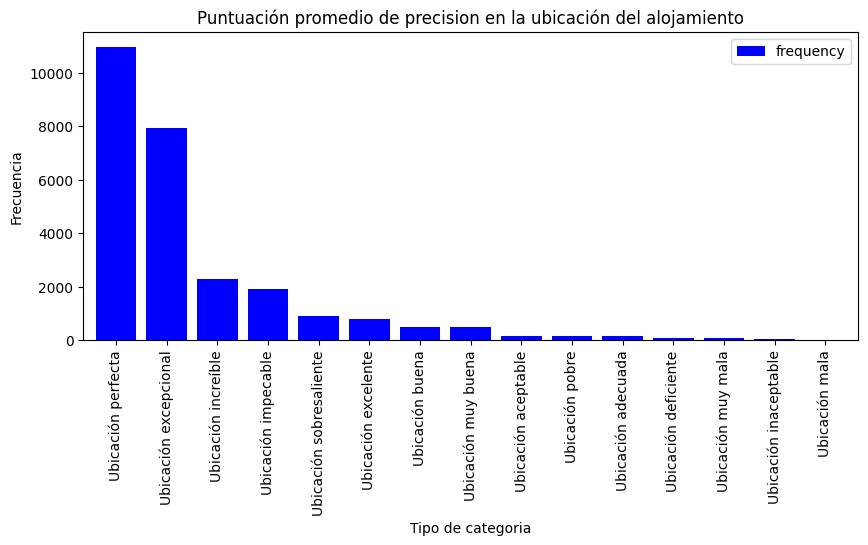

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de precision en la ubicación del alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')